# How things go wrong for a stochastic MJP model of gene expression

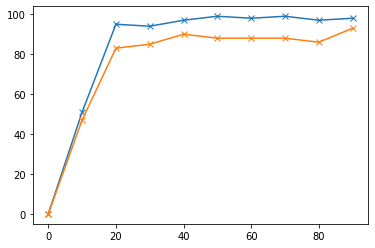

In [11]:
from study_abc_noise.model import MRNATranscription1dModelVars as ModelVars
import pyabc
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

n_t = 10
mv = ModelVars(n_t=n_t, noise_model='poisson')

model = mv.get_model()
model_noisy = mv.get_model_noisy()
prior = mv.get_prior()

def get_data():
    try:
        data_nonoise, data = pickle.load(open(f"data_{n_t}.dat", 'rb'))
    except:
        data_nonoise = model(mv.p_true)
        data = mv.add_noise_to_data(data_nonoise)
        pickle.dump((data_nonoise, data), open(f"data_{n_t}.dat", 'wb'))
    return data_nonoise, data

data_nonoise, data = get_data()

distance = mv.get_distance()
kernel = mv.get_kernel()
temperature = pyabc.Temperature()
acceptor = pyabc.StochasticAcceptor()

plt.plot(data_nonoise['t'], data_nonoise['mrna'], 'x-')
plt.plot(data['t'], data['mrna'], 'x-')

In [9]:
abc = pyabc.ABCSMC(model, prior, distance)
abc.new("sqlite:///h_incorrect_poisson_1d.db", data)
abc.run(max_nr_populations=15)

INFO:History:Start <ABCSMC(id=2, start_time=2020-01-08 19:42:49.936002, end_time=None)>
INFO:ABC:Calibration sample before t=0.
INFO:Epsilon:initial epsilon is 56031.49999999987
INFO:ABC:t: 0, eps: 56031.49999999987.
INFO:ABC:Acceptance rate: 100 / 165 = 6.0606e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 19253.5.
INFO:ABC:Acceptance rate: 100 / 193 = 5.1813e-01, ESS=9.8107e+01.
INFO:ABC:t: 2, eps: 7442.271259214019.
INFO:ABC:Acceptance rate: 100 / 225 = 4.4444e-01, ESS=9.9748e+01.
INFO:ABC:t: 3, eps: 4274.874106907801.
INFO:ABC:Acceptance rate: 100 / 211 = 4.7393e-01, ESS=9.5691e+01.
INFO:ABC:t: 4, eps: 3258.2763690947863.
INFO:ABC:Acceptance rate: 100 / 255 = 3.9216e-01, ESS=8.5309e+01.
INFO:ABC:t: 5, eps: 2516.480060011911.
INFO:ABC:Acceptance rate: 100 / 452 = 2.2124e-01, ESS=8.6336e+01.
INFO:ABC:t: 6, eps: 2108.914930279476.
Process Process-97:
Traceback (most recent call last):
  File "/home/yannik/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.

KeyboardInterrupt: 

  File "/home/yannik/pyabc/pyabc/smc.py", line 594, in simulate_one
    weight_function)
  File "/home/yannik/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/yannik/pyabc/pyabc/sampler/multicore_evaluation_parallel.py", line 32, in work
    new_sim = simulate_one()
  File "/home/yannik/pyabc/pyabc/model.py", line 121, in summary_statistics
    raw_data = self.sample(pars)
  File "/home/yannik/pyabc/pyabc/smc.py", line 594, in simulate_one
    weight_function)
  File "/home/yannik/pyabc/pyabc/smc.py", line 679, in _evaluate_proposal
    x_0)
  File "/home/yannik/pyabc/pyabc/smc.py", line 679, in _evaluate_proposal
    x_0)
  File "/home/yannik/pyabc/pyabc/model.py", line 270, in sample
    return self.sample_function(pars)
  File "/home/yannik/pyabc/pyabc/model.py", line 227, in accept
    sum_stats_calculator)
  File "/home/yannik/Documents/Project8_pyABC_Noise/Study-ABC-Noise/study_abc_noise/model/mrna_tr

In [4]:
abc = pyabc.ABCSMC(model, prior, kernel, eps=temperature, acceptor=acceptor)
abc.new("sqlite:///h_stochastic_acceptor_poisson_1d.db", data)
abc.run()

INFO:History:Start <ABCSMC(id=1, start_time=2020-01-08 19:35:19.697945, end_time=None)>
INFO:ABC:Calibration sample before t=0.
DEBUG:Acceptor:pdf_norm=-7.7871e+01 for t=0.
INFO:ABC:t: 0, eps: 241.7748661330661.
DEBUG:Acceptor:Encountered pd=-7.2867e+01 > c=-7.7871e+01, thus weight=1.0209e+00.
DEBUG:Acceptor:Encountered pd=-7.6418e+01 > c=-7.7871e+01, thus weight=1.0060e+00.
DEBUG:Acceptor:Encountered pd=-7.1598e+01 > c=-7.7871e+01, thus weight=1.0263e+00.
DEBUG:Acceptor:Encountered pd=-7.5016e+01 > c=-7.7871e+01, thus weight=1.0119e+00.
INFO:ABC:Acceptance rate: 100 / 284 = 3.5211e-01, ESS=9.9999e+01.
DEBUG:Acceptor:pdf_norm=-7.1598e+01 for t=1.
INFO:ABC:t: 1, eps: 35.106590648234366.
DEBUG:Acceptor:Encountered pd=-7.1434e+01 > c=-7.1598e+01, thus weight=1.0047e+00.
INFO:ABC:Acceptance rate: 100 / 446 = 2.2422e-01, ESS=9.8131e+01.
DEBUG:Acceptor:pdf_norm=-7.1434e+01 for t=2.
INFO:ABC:t: 2, eps: 17.553295324117183.
DEBUG:Acceptor:Encountered pd=-7.1427e+01 > c=-7.1434e+01, thus weight=

KeyboardInterrupt


KeyboardInterrupt: 

5 3


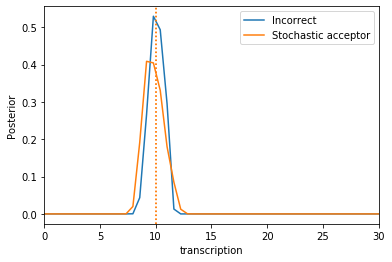

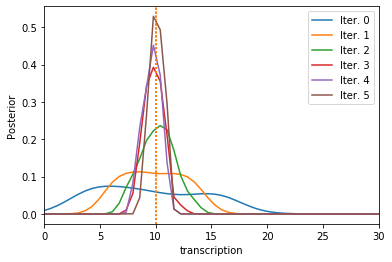

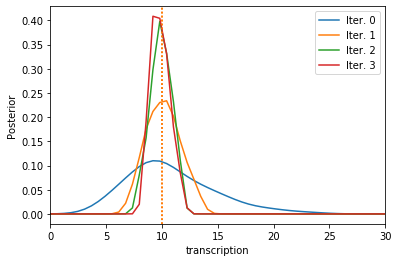

In [10]:
import pyabc
%matplotlib inline

def plot(h, x, ax, limits, p_true):
    for t in range(0, h.max_t + 1):
        pyabc.visualization.plot_kde_1d_highlevel(
            h, t=t, x=x, xmin=limits[x][0], xmax=limits[x][1], ax=ax,
            refval=p_true, label=f"Iter. {t}")
    ax.legend()
    return ax

h_incorrect = pyabc.History("sqlite:///h_incorrect_poisson_1d.db")
h = pyabc.History("sqlite:///h_stochastic_acceptor_poisson_1d.db")
print(h_incorrect.max_t, h.max_t)

for p in mv.p_true:
    _, ax = plt.subplots()
    for h, label in [(h_incorrect, "Incorrect"), (h, "Stochastic acceptor")]:
        pyabc.visualization.plot_kde_1d_highlevel(h, x=p, xmin=mv.limits[p][0], xmax=mv.limits[p][1], ax=ax,
                                                 refval=mv.p_true, label=label)
    ax.legend()

for p in mv.p_true:
    _, ax = plt.subplots()
    plot(h_incorrect, p, ax, mv.limits, mv.p_true)
    _, ax = plt.subplots()
    plot(h, p, ax, mv.limits, mv.p_true)
    ax.legend()